In [4]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# load numpy images 
np_positive = np.load('/Users/chucklin/Documents/GitHub/COVID-detection-pipeline/Data/COVIDGR_1.0/COVID Positive Array 224.npy')
np_negative = np.load('/Users/chucklin/Documents/GitHub/COVID-detection-pipeline/Data/COVIDGR_1.0/COVID Negative Array 224.npy')

In [6]:
#  number of images
print("number of positive cases: ", np_positive.shape[0])
print("number of negative cases: ", np_negative.shape[0])


number of positive cases:  426
number of negative cases:  426


In [7]:
# Image dimension 
print("image dimension (height, width, channel): ", np_positive.shape[1:])

image dimension (height, width, channel):  (224, 224, 1)


In [8]:
# Image data type
print("image data type: ", np_positive.dtype)

image data type:  float32


In [9]:
# Average image intensity
print("average positive image intensity: ", np.mean(np_positive))
print("average negative image intensity: ", np.mean(np_negative))

# Maximum image intensity 
print("maximum positive image intensity: ", np.max(np_positive))
print("maximum negative image intensity: ", np.max(np_negative))

# Minimum image intensity
print("minimum positive image intensity: ", np.min(np_positive))
print("minimum negative image intensity: ", np.min(np_negative))

## Stadard deviation of image intensity
print("standard deviation of positive image intensity: ", np.std(np_positive))
print("standard deviation of negative image intensity: ", np.std(np_negative))


average positive image intensity:  0.5315131
average negative image intensity:  0.52109694
maximum positive image intensity:  1.0
maximum negative image intensity:  0.9965407
minimum positive image intensity:  0.0
minimum negative image intensity:  0.0
standard deviation of positive image intensity:  0.23306735
standard deviation of negative image intensity:  0.23631656


In [23]:
# Average image intensity (compare between samples)
print("average positve image intensity: ", np.mean(np.mean(np_positive, axis=(1,2,3)))) 
print("average negative image intensity: ", np.mean(np.mean(np_negative, axis=(1,2,3)))) 

# Maximum image intensity 
max_pos_intensity= np.max(np.mean(np_positive, axis=(1,2,3)))
print("maximum positve image intensity: ", max_pos_intensity)
max_neg_intensity= np.max(np.mean(np_negative, axis=(1,2,3)))
print("maximum negative image intensity: ", max_neg_intensity)

# Minimum image intensity
min_pos_intensity= np.min(np.mean(np_positive, axis=(1,2,3)))
print("minimum positve image intensity: ", min_pos_intensity)
min_neg_intensity= np.min(np.mean(np_negative, axis=(1,2,3)))
print("minimum negative image intensity: ", min_neg_intensity)

## Stadard deviation of image intensity
print("standard of positve image intensity: ", np.std(np.mean(np_positive, axis=(1,2,3))))
print("standard of negative image intensity: ", np.std(np.mean(np_negative, axis=(1,2,3))))

average positve image intensity:  0.5315129
average negative image intensity:  0.521097
maximum positve image intensity:  0.7555852
maximum negative image intensity:  0.6609612
minimum positve image intensity:  0.26859397
minimum negative image intensity:  0.20477217
standard of positve image intensity:  0.05474118
standard of negative image intensity:  0.05072282


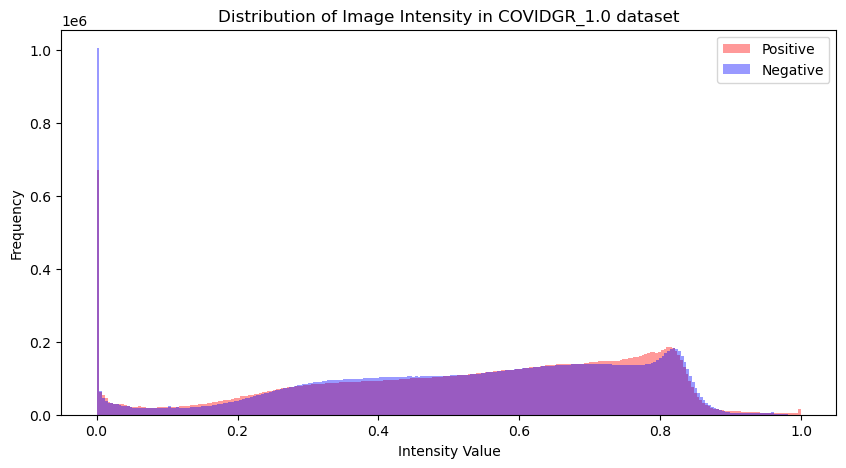

In [10]:
# Create a histogram of the image intensity
plt.figure(figsize=(10, 5))
plt.hist(np_positive.ravel(), bins=256, color='red', alpha=0.4, label='Positive')
plt.hist(np_negative.ravel(), bins=256, color='blue', alpha=0.4, label='Negative')
plt.legend(loc='upper right')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Distribution of Image Intensity in COVIDGR_1.0 dataset')
plt.show()

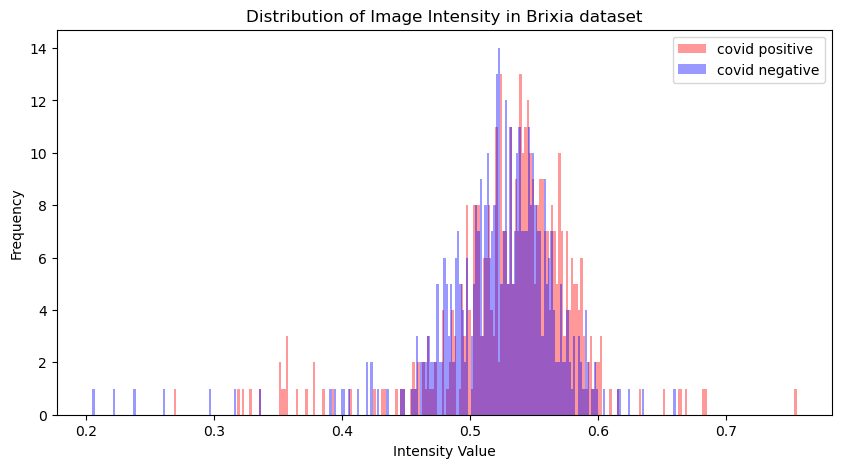

In [24]:
# Create a histogram of the image intensity
plt.figure(figsize=(10, 5))
plt.hist(np.mean(np_positive, axis=(1,2,3)), bins=256, color='red', alpha=0.4, label='covid positive')
plt.hist(np.mean(np_negative, axis=(1,2,3)), bins=256, color='blue', alpha=0.4, label='covid negative')
plt.legend(loc='upper right')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Distribution of Image Intensity in Brixia dataset')
plt.show()

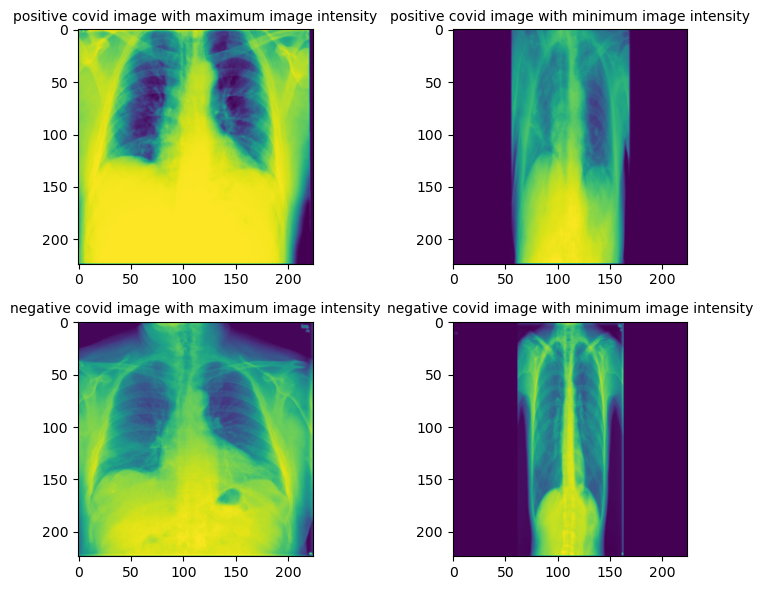

In [30]:
# Visualize the max and min intensity images -- can we see any visual difference?
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

axs[0].imshow(np_positive[np.argmax(np.mean(np_positive, axis=(1,2,3))), :, :,:])
axs[0].set_title("positive covid image with maximum image intensity", fontsize=10)

axs[1].imshow(np_positive[np.argmin(np.mean(np_positive, axis=(1,2,3))), :, :,:])
axs[1].set_title("positive covid image with minimum image intensity", fontsize=10)

axs[2].imshow(np_negative[np.argmax(np.mean(np_negative, axis=(1,2,3))), :, :,:])
axs[2].set_title("negative covid image with maximum image intensity", fontsize=10)

axs[3].imshow(np_negative[np.argmin(np.mean(np_negative, axis=(1,2,3))), :, :,:])
axs[3].set_title("negative covid image with minimum image intensity", fontsize=10)

plt.tight_layout()
plt.show()

In [11]:
# Find outliers in the image intensity
outliers_positive = np_positive[np_positive > 255]
outliers_negative = np_negative[np_negative > 255]
print("number of outliers in positive cases: ", outliers_positive.shape[0])
print("number of outliers in negative cases: ", outliers_negative.shape[0])

number of outliers in positive cases:  0
number of outliers in negative cases:  0


In [12]:
# Find pixel correlation in the image
positive_corr = np.corrcoef(np_positive.reshape(-1))
negative_corr = np.corrcoef(np_negative.reshape(-1))
print("correlation of positive cases: ", positive_corr)
print("correlation of negative cases: ", negative_corr)

correlation of positive cases:  1.0
correlation of negative cases:  1.0


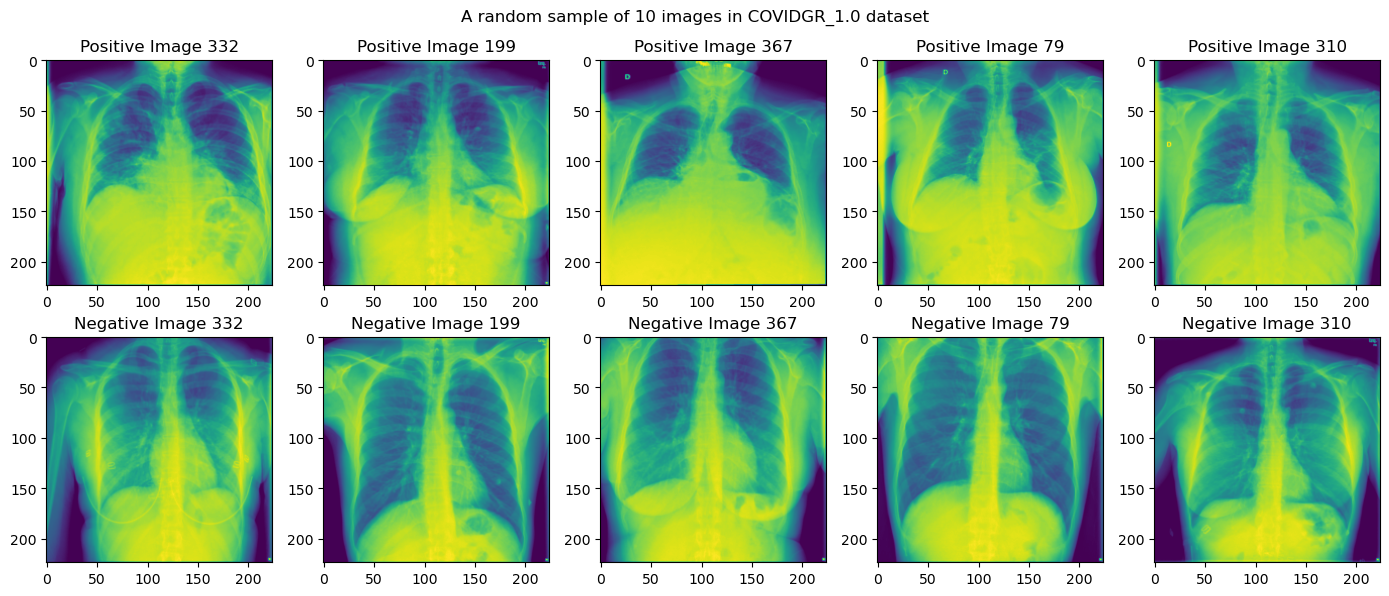

In [18]:
# Image example visualization
fig, axs = plt.subplots(2, num, figsize=(14, 6))  # Increase the number of subplots
axs = axs.flatten()

# plot 10 random samples
num = 5
indx = np.random.choice(len(np_positive)-1, num, replace=False)
for i in range(num):
    axs[i].imshow(np_positive[indx[i],:,:,:])  # Display positive image on the top row
    axs[i].set_title(f'Positive Image {indx[i]+1}')
    
    axs[i+num].imshow(np_negative[indx[i],:,:,:])  # Display negative image on the bottom row
    axs[i+num].set_title(f'Negative Image {indx[i]+1}')

# Adjust layout to prevent overlap
plt.suptitle("A random sample of 10 images in COVIDGR_1.0 dataset")
plt.tight_layout()

plt.show()




In [ ]:
plt.imshow(np_positive[10]) 
plt.title('COVID Positive example in COVIDGR_1.0 dataset')
plt.show()
plt.imshow(np_negative[10])
plt.title('COVID Negative example in COVIDGR_1.0 dataset')
plt.show()